In [10]:
!pip install -q spectral
!pip install -q rasterio

     |████████████████████████████████| 19.3 MB 51.5 MB/s 


In [12]:
# Bibliotecas
import rasterio as rio
from spectral import *
import numpy as np

In [13]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b7 = src.read(6)

img = np.dstack([b1,b2,b3,b4,b5,b7])

In [15]:
# Armazenando metadados
meta = src.profile

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [27.0, 99.0]
    G: [36.0, 75.0]
    B: [50.0, 78.0]

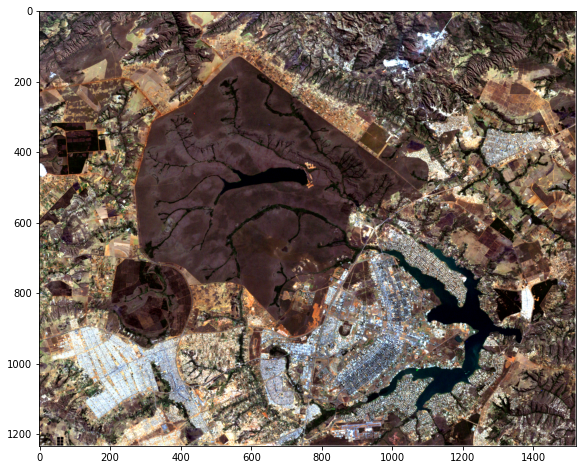

In [14]:
# visualizando imagem
imshow(img, (2,1,0), stretch=(0.02, 0.98), figsize=(12,8))

In [21]:
# Rodando ppi
ppi_img = ppi(img, 1000)

Running 1000 pixel purity iterations...  0.0%Running 1000 pixel purity iterations...  1.0%Running 1000 pixel purity iterations...  2.0%Running 1000 pixel purity iterations...  3.0%Running 1000 pixel purity iterations...  4.0%Running 1000 pixel purity iterations...  5.0%Running 1000 pixel purity iterations...  6.0%Running 1000 pixel purity iterations...  7.0%Running 1000 pixel purity iterations...  8.0%Running 1000 pixel purity iterations...  9.0%Running 1000 pixel purity iterations... 10.0%Running 10

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 288.0]
    G: [0.0, 288.0]
    B: [0.0, 288.0]

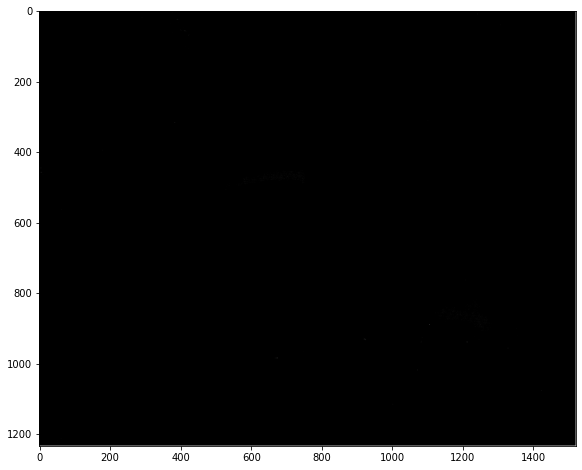

In [23]:
# Visualizando ppi
imshow(ppi_img, figsize=(12,8))

In [24]:
# Gravando resultado em disco
meta.update({'count': 1})

with rio.open('ppi.tif', 'w', **meta) as src:
    src.write(ppi_img,1)